### Homework1

In [1]:
# Define the class for Perceptron

import numpy as np

class Perceptron(object):
    def __init__(self,epochs,epsilon):
        self.epochs=epochs
        self.epsilon=epsilon
    
    def train(self,X,y):
        self.w=np.random.rand(2)
        self.b=np.random.rand()
        for _ in range(self.epochs):
            total_error=0
            for i in range(len(X)):
                z=self.w.dot(X[i])+self.b
                y_hat=1 if z>0 else -1
                self.w=self.w-(1/2)*(y_hat-y[i])*X[i]
                self.b=self.b-(1/2)*(y_hat-y[i])
                total_error += 1/4 * (y_hat-y[i])**2
            if total_error<self.epsilon:
                break
        return self
    
    def predict(self,X):
        z=np.dot(X,self.w)+self.b
        return np.where(z>=0,1,-1)

In [2]:
# Data of Palmer_Penguins.csv
# First import the standard data science libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

#load data
df_pp=pd.read_csv('Datasets/palmer_penguins.csv')
filt=df_pp['bill_length_mm'].isna()==1
df_pp=df_pp[~filt]
df_pp

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...,...
338,338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
#check the species category study the species with length and depth
df_pp['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

       species  bill_length_mm  bill_depth_mm
0       Adelie            39.1           18.7
1       Adelie            39.5           17.4
2       Adelie            40.3           18.0
4       Adelie            36.7           19.3
5       Adelie            39.3           20.6
..         ...             ...            ...
215  Chinstrap            55.8           19.8
216  Chinstrap            43.5           18.1
217  Chinstrap            49.6           18.2
218  Chinstrap            50.8           19.0
219  Chinstrap            50.2           18.7

[219 rows x 3 columns]
[[0.67413793 0.86976744]
 [0.68103448 0.80930233]
 [0.69482759 0.8372093 ]
 [0.63275862 0.89767442]
 [0.67758621 0.95813953]
 [0.67068966 0.82790698]
 [0.67586207 0.91162791]
 [0.58793103 0.84186047]
 [0.72413793 0.93953488]
 [0.65172414 0.79534884]
 [0.65172414 0.80465116]
 [0.70862069 0.81860465]
 [0.66551724 0.98604651]
 [0.59655172 0.98139535]
 [0.63103448 0.82790698]
 [0.66724138 0.88372093]
 [0.73275862 0.9627907 ]

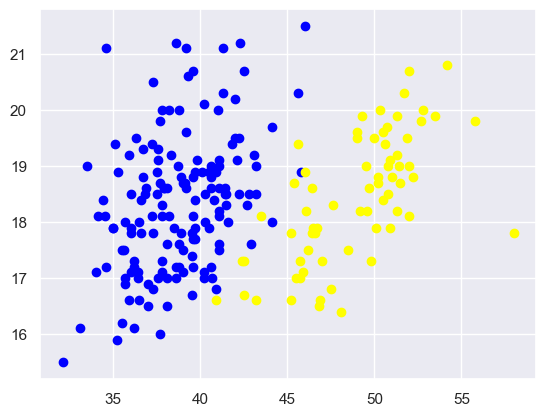

In [4]:
#For species, choose Adelie and Chinstrap
target_data=df_pp[['species','bill_length_mm','bill_depth_mm']]
filt=df_pp['species'].isin(['Adelie','Chinstrap'])
target_data=target_data[filt]
print(target_data)
filt=target_data['species']=='Adelie'
plt.scatter(target_data.loc[filt,'bill_length_mm'],target_data.loc[filt,'bill_depth_mm'],color='blue')
plt.scatter(target_data.loc[~filt,'bill_length_mm'],target_data.loc[~filt,'bill_depth_mm'],color='yellow')
# We can see there is also a hyperplane for species Adelie and Chinstrap.

#function that tranforms species into numbers
def species_to_number(species):
    if species=='Adelie':
        return 1
    else:
        return -1
    
# get the data for Perceptron
target_data['species']=target_data['species'].apply(species_to_number)
X=target_data[['bill_length_mm','bill_depth_mm']].values
y=target_data['species'].values

# normalize the data
X[:,0]=X[:,0]/X[:,0].max()
X[:,1]=X[:,1]/X[:,1].max()
print(X)

In [5]:
perceptron=Perceptron(epochs=10000,epsilon=0.01)
perceptron.train(X,y)
perceptron.predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

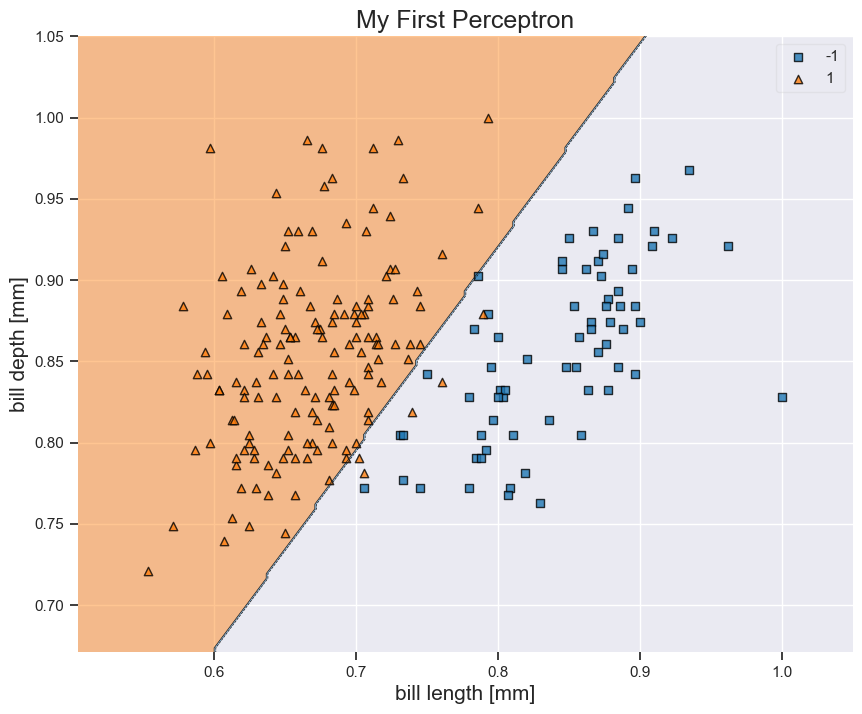

In [6]:
# import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = perceptron)
plt.xlim(X[:,0].min()-0.05,X[:,0].max()+0.05)
plt.ylim(X[:,1].min()-0.05,X[:,1].max()+0.05)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.title("My First Perceptron", fontsize = 18)
plt.show()

       species  bill_length_mm  bill_depth_mm
152  Chinstrap            46.5           17.9
153  Chinstrap            50.0           19.5
154  Chinstrap            51.3           19.2
155  Chinstrap            45.4           18.7
156  Chinstrap            52.7           19.8
..         ...             ...            ...
338     Gentoo            47.2           13.7
340     Gentoo            46.8           14.3
341     Gentoo            50.4           15.7
342     Gentoo            45.2           14.8
343     Gentoo            49.9           16.1

[191 rows x 3 columns]
[[0.78020134 0.86057692]
 [0.83892617 0.9375    ]
 [0.86073826 0.92307692]
 [0.76174497 0.89903846]
 [0.88422819 0.95192308]
 [0.75838926 0.85576923]
 [0.77348993 0.875     ]
 [0.86073826 0.875     ]
 [0.77181208 0.90865385]
 [0.86073826 0.95673077]
 [0.78187919 0.85576923]
 [0.86744966 0.97596154]
 [0.7885906  0.83173077]
 [0.87248322 0.87019231]
 [0.77013423 0.82211538]
 [0.84731544 0.94230769]
 [0.84395973 0.96153846]

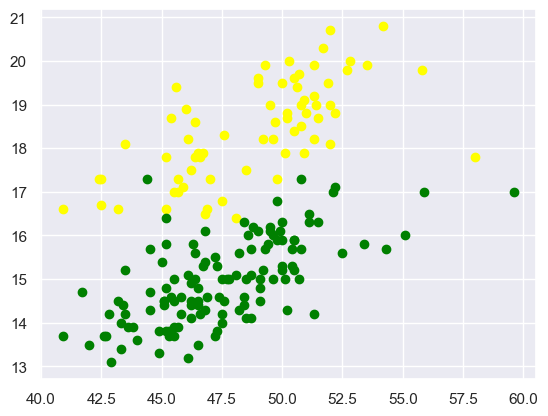

In [7]:
#For species, choose Chinstrap and Gentoo
df_pp['species'].unique()
target_data=df_pp[['species','bill_length_mm','bill_depth_mm']]
filt=df_pp['species'].isin(['Chinstrap','Gentoo'])
target_data=target_data[filt]
print(target_data)
filt=target_data['species']=='Chinstrap'
plt.scatter(target_data.loc[filt,'bill_length_mm'],target_data.loc[filt,'bill_depth_mm'],color='yellow')
plt.scatter(target_data.loc[~filt,'bill_length_mm'],target_data.loc[~filt,'bill_depth_mm'],color='green')
# We can see there is also a hyperplane for species Adelie and Chinstrap.

#function that tranforms species into numbers
def species_to_number(species):
    if species=='Chinstrap':
        return 1
    else:
        return -1
    
#get the data for Perceptron
target_data['species']=target_data['species'].apply(species_to_number)
X=target_data[['bill_length_mm','bill_depth_mm']].values
y=target_data['species'].values

# normalize the data
X[:,0]=X[:,0]/X[:,0].max()
X[:,1]=X[:,1]/X[:,1].max()
print(X)

In [8]:
perceptron=Perceptron(epochs=10000,epsilon=0.01)
perceptron.train(X,y)
perceptron.predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1])

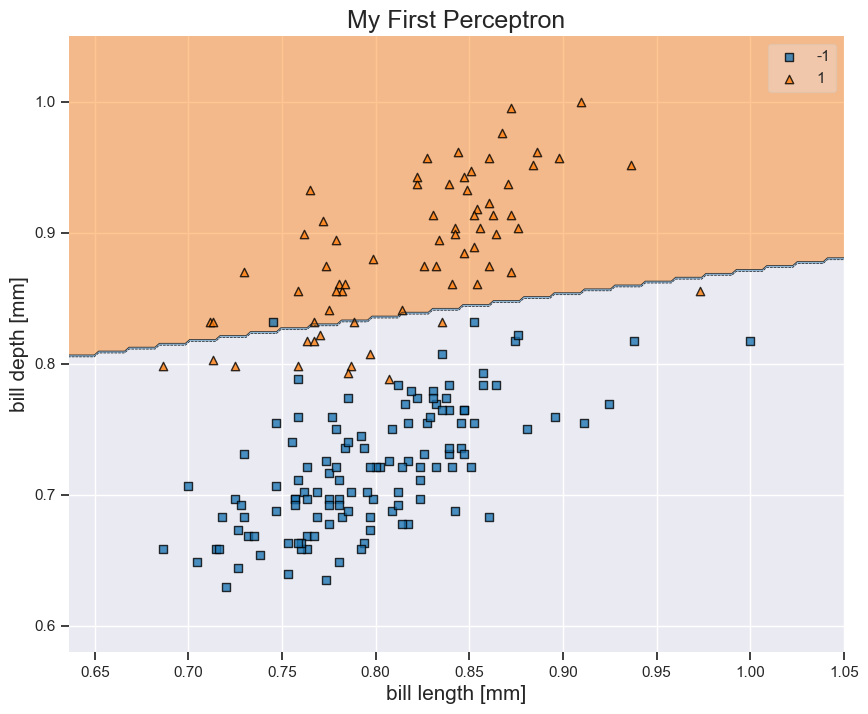

In [9]:
# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = perceptron)
plt.xlim(X[:,0].min()-0.05,X[:,0].max()+0.05)
plt.ylim(X[:,1].min()-0.05,X[:,1].max()+0.05)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.title("My First Perceptron", fontsize = 18)
plt.show()